In [8]:
# General
import sys
import os
from time import time
from collections import OrderedDict as od
# from importlib import reload
# from glob import glob
# import itertools
# import h5py

# Scientific
import numpy as np
# import pandas as pd
# pd.options.display.max_rows = 200
# pd.options.display.max_columns = 999
# import scipy.io as sio

# Stats
# import scipy.stats as stats
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# import random
# from sklearn.decomposition import PCA

# Plots
import matplotlib.pyplot as plt
%matplotlib inline
# import seaborn as sns
import matplotlib as mpl
# from matplotlib.lines import Line2D
# import matplotlib.patches as patches
mpl.rcParams['grid.linewidth'] = 0.1
mpl.rcParams['grid.alpha'] = 0.75
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['lines.markersize'] = 3
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['ytick.labelsize'] = 15 
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.formatter.offset_threshold'] = 2
mpl.rcParams['axes.labelsize'] = 17
mpl.rcParams['axes.labelpad'] = 10
mpl.rcParams['axes.titlesize'] = 19
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.axisbelow'] = True
mpl.rcParams['legend.loc'] = 'upper right'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.titlesize'] = 19
mpl.rcParams['figure.figsize'] = (6.85039, 4.79527) 
mpl.rcParams['figure.subplot.wspace'] = 0.25 
mpl.rcParams['figure.subplot.hspace'] = 0.25 
mpl.rcParams['font.sans-serif'] = ['Helvetica']
mpl.rcParams['savefig.format'] = 'pdf'
mpl.rcParams['pdf.fonttype'] = 42
colors = ['1f77b4', 'd62728', '2ca02c', 'ff7f0e', '9467bd', 
          '8c564b', 'e377c2', '7f7f7f', 'bcbd22', '17becf']
mpl.rcParams['axes.prop_cycle'] = mpl.cycler('color', colors)

# Personal
# sys.path.append('/home1/dscho/code/general')
# sys.path.append('/home1/dscho/code/projects/manning_replication')
# sys.path.append('/home1/dscho/code/projects/time_cells')
# import data_io as dio
# import array_operations as aop
# from eeg_plotting import plot_trace, plot_trace2
# import spike_preproc

# Colors
# n = 4
# c = 2
# colors = [sns.color_palette('Blues', n)[c], 
#           sns.color_palette('Reds', n)[c], 
#           sns.color_palette('Greens', n)[c],
#           sns.color_palette('Purples', n)[c],
#           sns.color_palette('Oranges', n)[c],
#           sns.color_palette('Greys', n)[c],
#           sns.color_palette('YlOrBr', n+3)[c],
#           'k']
# cmap = sns.palettes.blend_palette((colors[0], 
#                                    'w',
#                                    colors[1]), 501)

In [3]:
# Simulate a trial.
def get_trial_times(item_dur=2,
                    n_items=12, 
                    inter_item_steps=12, 
                    inter_item_step_dur=0.5):
    """Return times for one trial of timed_fr.
    
    Each inter-item interval is selected at random.
    
    Parameters
    ----------
    n_items : int
        The number of study items in the trial.
    item_dur : int or float
        How long each study item is presented, in sec.
    inter_item_steps : int
        The number of potential inter-item durations.
    inter_item_step_dur : int or float
        The duration of each inter-item step size, in sec.
        After each item offset, the potential inter-item 
        duration ranges from (1 * inter_item_step_dur)
        to (inter_item_steps * inter_item_step_dur).
    """
    trial_times = od([])
    trial_times['item_durs'] = item_dur * np.ones(n_items)
    trial_times['inter_item_durs'] = inter_item_step_dur * np.random.randint(1, 1+inter_item_steps, n_items)
    trial_times['item_onset_times'] = np.cumsum(np.vstack((trial_times['item_durs'], 
                                                           trial_times['inter_item_durs']))
                                                 .reshape((-1,), order='F'))[::2] - item_dur
    trial_times['item_offset_times'] = trial_times['item_onset_times'] + item_dur
    return trial_times

In [6]:
trial_times = get_trial_times()
trial_times

OrderedDict([('item_durs',
              array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])),
             ('inter_item_durs',
              array([1. , 6. , 3.5, 6. , 3.5, 1. , 6. , 5.5, 6. , 0.5, 5. , 5.5])),
             ('item_onset_times',
              array([ 0. ,  3. , 11. , 16.5, 24.5, 30. , 33. , 41. , 48.5, 56.5, 59. ,
                     66. ])),
             ('item_offset_times',
              array([ 2. ,  5. , 13. , 18.5, 26.5, 32. , 35. , 43. , 50.5, 58.5, 61. ,
                     68. ]))])

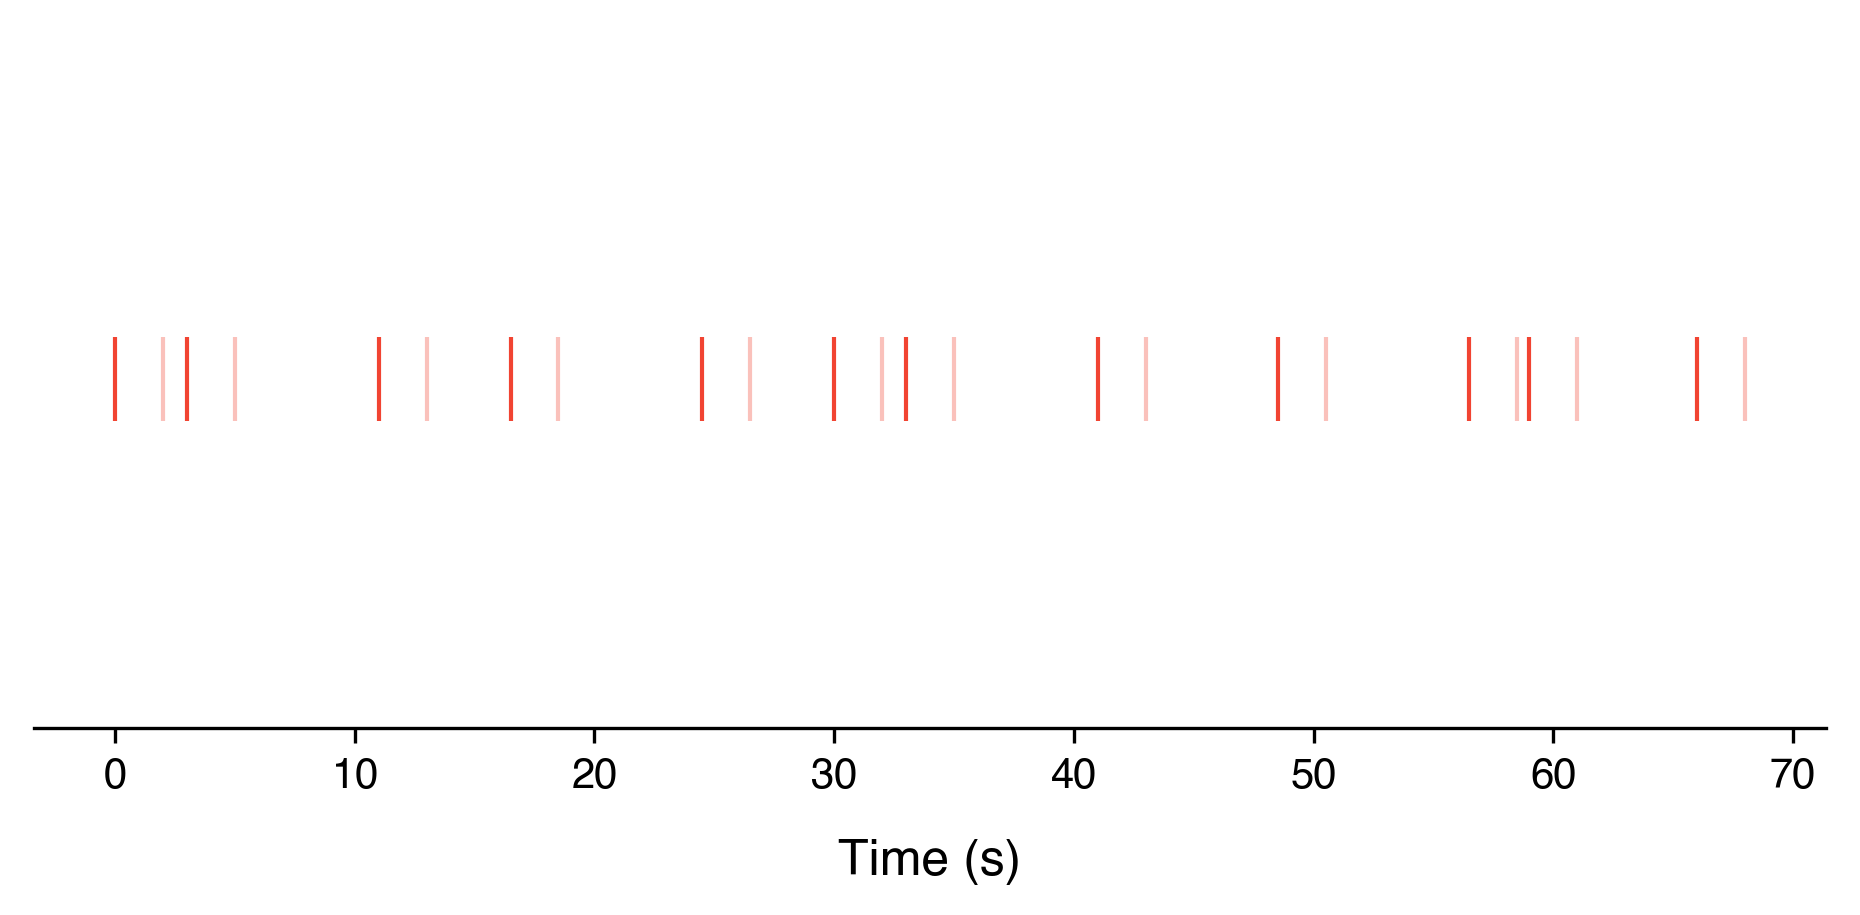

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6.3, 6.3*0.5), dpi=300)
ax = np.ravel(ax)

tickfontsize = 10
labelfontsize = 12

i = 0
ax[i].plot(trial_times['item_onset_times'], np.ones(len(trial_times['item_onset_times'])), 
           linewidth=0, color=colors[1], marker='|', markersize=20, markeredgewidth=1)
ax[i].plot(trial_times['item_offset_times'], np.ones(len(trial_times['item_onset_times'])), 
           linewidth=0, color=colors[1], alpha=0.33, marker='|', markersize=20, markeredgewidth=1)
ax[i].set_xticks(np.arange(80, step=10))
ax[i].set_xticklabels(np.arange(80, step=10), fontsize=tickfontsize)
ax[i].set_xlabel('Time (s)', fontsize=labelfontsize, labelpad=10)
ax[i].axes.get_yaxis().set_visible(False)
ax[i].spines['left'].set_visible(False)

fig.tight_layout()

if False:
    fig.savefig('/home1/dscho/projects/timed_fr/figs/timed_fr-example_trial_times.pdf', 
                format='pdf', bbox_inches='tight')